# Data Cleaning 2 - Tidying up a column

In Chapter 3, we've learned how to convert the a `float` or `int` column to a `category` datatype. But in real-life, a "messy" column is stored as "object", which is roughly analogous to str in native Python. In this example, we will clean the `BL-Flickr-Images-Book.csv` data file which contains information about books from the British Library.

In [1]:
import pandas as pd
df = pd.read_csv("./data/BL-Flickr-Images-Book.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8287 entries, 0 to 8286
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Identifier              8287 non-null   int64  
 1   Edition Statement       773 non-null    object 
 2   Place of Publication    8287 non-null   object 
 3   Date of Publication     8106 non-null   object 
 4   Publisher               4092 non-null   object 
 5   Title                   8287 non-null   object 
 6   Author                  6509 non-null   object 
 7   Contributors            8287 non-null   object 
 8   Corporate Author        0 non-null      float64
 9   Corporate Contributors  0 non-null      float64
 10  Former owner            1 non-null      object 
 11  Engraver                0 non-null      float64
 12  Issuance type           8287 non-null   object 
 13  Flickr URL              8287 non-null   object 
 14  Shelfmarks              8287 non-null   

In [58]:
df.head()

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


## 1 drop NA values in a column

We can use df.dropna() to remove missing values.

In [2]:
df = df.dropna(subset=["Place of Publication"])

When we want to consider several columns, we need to specify the `how=` argument. 

`‘any’` : If any NA values are present, drop that row or column. \
`‘all’` : If all values are NA, drop that row or column. \
By default, how='any'.

In [3]:
df = df.dropna(subset=["Place of Publication","Contributors"],how='any')

## 2 Sort_values and set_index

In [4]:
# Set a unqie ID for each book
df = df.set_index('Identifier')

In [5]:
# sort df according to the ID
df = df.sort_values("Identifier")

In [63]:
df.head()

,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
Identifier,,,,,,,,,,,,,,
206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


## 3 Get a column to a uniform format using re

In the `Date of publication` column, there are `year` of publication stored in different format. To view the abnormal entries, we can select dates that are longer than 4 characters.

> Series.str vectorize string functions for Series and Index. Useful string functions includes .len(), .split(), .extract(). An expanded function list can be found [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.capitalize.html)

In [6]:
df.loc[df["Date of Publication"].str.len() > 4,"Date of Publication"].head(10)

Identifier
206             1879 [1878]
1929            1839, 38-54
2956                1860-63
5382     1847, 48 [1846-48]
5385                [1897?]
5389                [1897?]
11361              [1894-96
13364                [1885]
14466               [1860?]
17752                [1833]
Name: Date of Publication, dtype: object

 However,a particular book can have only one date of publication. Therefore, we need to do the following:

1. Remove the extra dates in square brackets, wherever present: 1879 [1878]
2. Convert date ranges to their “start date”, wherever present: 1860-63; 1839, 38-54
3. Completely remove the dates we are not certain about and replace them with NumPy’s NaN: [1897?]
4. Convert the string nan to NumPy’s NaN value

Synthesizing these patterns, we can actually take advantage of a single regular expression to extract the publication year:

In [7]:
import re
pat = r"(\d{4})"

In [8]:
df["Date of Publication"] = df["Date of Publication"].str.extract(pat)

In [14]:
df["Date of Publication"].to_numer

AttributeError: 'Series' object has no attribute 'to_numerical'

The \d represents any digit, and {4} repeats this rule four times. The ^ character matches the start of a string, and the parentheses denote a capturing group, which signals to Pandas that we want to extract that part of the regex. (We want ^ to avoid cases where [ starts off the string.)

In [67]:
df.head()

,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
Identifier,,,,,,,,,,,,,,
206,NaN,London,1879,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


In [8]:
df["Date of Publication"] = df["Date of Publication"].str.extract(pat)
df.head()

,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
Identifier,,,,,,,,,,,,,,
206,NaN,London,1879,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


Technically, this column still has object dtype. Let's change its data type using .astype()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8287 entries, 206 to 4160339
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Edition Statement       773 non-null    object 
 1   Place of Publication    8287 non-null   object 
 2   Date of Publication     8104 non-null   object 
 3   Publisher               4092 non-null   object 
 4   Title                   8287 non-null   object 
 5   Author                  6509 non-null   object 
 6   Contributors            8287 non-null   object 
 7   Corporate Author        0 non-null      float64
 8   Corporate Contributors  0 non-null      float64
 9   Former owner            1 non-null      object 
 10  Engraver                0 non-null      float64
 11  Issuance type           8287 non-null   object 
 12  Flickr URL              8287 non-null   object 
 13  Shelfmarks              8287 non-null   object 
dtypes: float64(3), object(11)
memory us

In [10]:
df["Date of Publication"] = df["Date of Publication"].astype("int16")

ValueError: cannot convert float NaN to integer

The error message states that there are unrecognized strings "NaN" in the date column. pd.to_numeric() can handle these anomalies.

In [11]:
df["Date of Publication"] = pd.to_numeric(df["Date of Publication"])

In [12]:
df.head()

,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
Identifier,,,,,,,,,,,,,,
206,NaN,London,1879.0,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
216,NaN,London; Virtue & Yorston,1868.0,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
218,NaN,London,1869.0,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
472,NaN,London,1851.0,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
480,"A new edition, revised, etc.",London,1857.0,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


In [13]:
df["Date of Publication"].dropna().astype("int16")

Identifier
206        1879
216        1868
218        1869
472        1851
480        1857
           ... 
4158088    1838
4158128    1831
4159563    1806
4159587    1834
4160339    1834
Name: Date of Publication, Length: 8104, dtype: int16

## 3.2 Another example using df.str.replace()

To clean the Place of Publication field, we can use the .str.replace() method

In [14]:
df["Place of Publication"]

Identifier
206                          London
216        London; Virtue & Yorston
218                          London
472                          London
480                          London
                     ...           
4158088                      London
4158128                       Derby
4159563                      London
4159587         Newcastle upon Tyne
4160339                      London
Name: Place of Publication, Length: 8287, dtype: object

We see that for some rows, the place of publication is surrounded by other unnecessary information. Let’s take a look at two specific entries:

```
Place of Publication                                  Newcastle-upon-Tyne
Name: 4157862, dtype: object
```

```
Place of Publication                                  Newcastle upon Tyne
Name: 4159587, dtype: object
```

These two books were published in the same place, but one has hyphens in the name of the place while the other does not.
To clean this column in one sweep, we can use str.replace() to get a Boolean mask.

In [15]:
df["Place of Publication"] = df["Place of Publication"].str.replace(r"\W+","-")
df["Place of Publication"]

/var/folders/jt/hphk8qzd0hd322w0ywqljvgh0000gn/T/ipykernel_86485/888533781.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Place of Publication"] = df["Place of Publication"].str.replace(r"\W+","-")


Identifier
206                       London
216        London-Virtue-Yorston
218                       London
472                       London
480                       London
                   ...          
4158088                   London
4158128                    Derby
4159563                   London
4159587      Newcastle-upon-Tyne
4160339                   London
Name: Place of Publication, Length: 8287, dtype: object

## 3 Expand a column into multiple columns

In the Author column, there are multiple authors whose name are separated using a `,`. We want to

1. split their names by ",", and 
2. keep the first 3 author names
3. expand the list into several columns

In [25]:
df["Author"].head(10)

Identifier
206             A. A.
216         A., A. A.
218         A., A. A.
472         A., E. S.
480         A., E. S.
481         A., E. S.
519         A., F. E.
667     A., J.|A., J.
874            Remaʿ.
1143           A., T.
Name: Author, dtype: object

To do this, we are going to use the `expand` parameter which is available in most df.str methods

In [16]:
df[["Author1","Author2","Author3"]] = df["Author"].str.split(",", n=2, expand=True)
t = df[["Author1","Author2","Author3"]]
t

,Author1,Author2,Author3
Identifier,,,
206,A. A.,None,None
216,A.,A. A.,None
218,A.,A. A.,None
472,A.,E. S.,None
480,A.,E. S.,None
...,...,...,...
4158088,GIDDY,afterwards GILBERT,Davies.
4158128,GLOVER,Stephen - of Derby,None
4159563,LYSONS,Daniel - M.A.,"F.R.S., and LYSONS (Samuel) F.R.S"


In [22]:
t.notna().sum()

Author1    6509
Author2    6403
Author3     437
dtype: int64

In [19]:
import seaborn as sns

<AxesSubplot:ylabel='Identifier'>

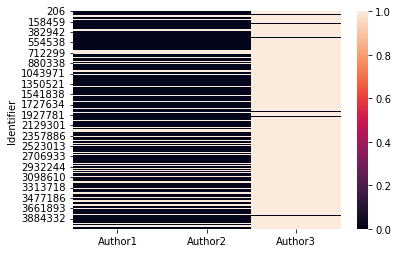

In [20]:
sns.heatmap(t.isna())

In [24]:
df.drop_duplicates(subset=[])

Identifier
206                                                    A. A.
216                                                A., A. A.
472                                                A., E. S.
519                                                A., F. E.
667                                            A., J.|A., J.
                                 ...                        
4157746                                      FABYAN, Robert.
4157862        FORDYCE, T. - Printer, of Newcastle-upon-Tyne
4158088                   GIDDY, afterwards GILBERT, Davies.
4159563    LYSONS, Daniel - M.A., F.R.S., and LYSONS (Sam...
4159587                                Mackenzie, E. (Eneas)
Name: Author, Length: 5006, dtype: object

## 4. the apply function

[Series.apply()](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html) is a flexible method that allows us to apply a "function" to each element of a column. 

As an example, if we want to iterate over the "Shelfmarker" column and see if the first numeric part of the marker is greater than 10000. We can define a function that takes each entry as the input and returns a boolean value.

In [25]:
df.head()

,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks,Author1,Author2,Author3
Identifier,,,,,,,,,,,,,,,,,
206,NaN,London,1879,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.,A. A.,None,None
216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.,A.,A. A.,None
218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.,A.,A. A.,None
472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.,A.,E. S.,None
480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.,A.,E. S.,None


In [26]:
def marker_g_10(ele):
    marker = re.search(r"\d+\..+\.(\d+)",ele)
    if marker:
        n = int(marker.group(1))
        return n>10
    else:
        return False

in the regular expression, `\d` means a number, `+` means there are at least 1 number, `\.` escapes the special character `.` , `.+` means in the second section there can be any character for at least one occurrence, and the group character `()` captures the first section of the marker as a group.

In [27]:
df["new"]=df["Shelfmarks"].apply(marker_g_10)

In [28]:
df[["Shelfmarks","new"]]

,Shelfmarks,new
Identifier,,
206,British Library HMNTS 12641.b.30.,True
216,British Library HMNTS 12626.cc.2.,False
218,British Library HMNTS 12625.dd.1.,False
472,British Library HMNTS 10369.bbb.15.,True
480,British Library HMNTS 9007.d.28.,True
...,...,...
4158088,British Library HMNTS|British Library HMNTS 10...,True
4158128,British Library HMNTS|British Library HMNTS 10...,True
4159563,British Library HMNTS|British Library HMNTS 19...,False
